<a href="https://colab.research.google.com/github/Darianna-dev/TELECOM-X-2/blob/main/TelecomX_LATAM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
datos_json = "/content/drive/MyDrive/ALURA LATAM (ONE)/CHALLENGE-TELECOM-X/Archivos_TelecomX/TelecomX_Data.json"
datos = pd.read_json(datos_json)
datos.sample(3)

,customerID,Churn,customer,phone,internet,account
820,1163-VIPRI,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7064,9728-FTTVZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
1933,2732-ISEZX,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [52]:
# Aplanamos cada columna JSON por separado
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [53]:
# Se une todo en un solo DataFrame
datos = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

datos.sample(3)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4808,6584-VQMYT,No,Male,0,No,Yes,27,Yes,No,DSL,...,Yes,No,No,No,No,One year,No,Mailed check,56.20,1567.55
3523,4854-CIDCF,No,Female,1,No,No,3,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,No,Electronic check,73.85,196.4
4334,5949-XIKAE,Yes,Female,0,Yes,Yes,8,Yes,No,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.55,680.05


In [54]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [55]:
datos['Charges.Total'] = datos['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)  # Reemplaza cualquier tipo de string vacío, con espacios o tabs por NaN
datos['Charges.Total'] = pd.to_numeric(datos['Charges.Total'], errors='coerce')   # Convierte a numérico, forzando errores a NaN

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [56]:
# print(datos['Charges.Total'].unique())
print(datos['Charges.Total'].isna().sum())

11


In [57]:
print('Ver cantidad de valores nulos por columna')
print(datos.isnull().sum())
print('-------------------------------------------')
print('Ver porcentaje de valores nulos por columna')
print(datos.isnull().sum() * 100 /len(datos))
print('-------------------------------------------')


Ver cantidad de valores nulos por columna
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64
-------------------------------------------
Ver porcentaje de valores nulos por columna
customerID          0.000000
Churn               0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.0000

In [58]:
# Se eliminan las filas donde 'Charges.Total' es NaN
datos.dropna(subset=['Charges.Total'], inplace=True)
print(datos.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [59]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

In [60]:
columnas = datos.columns
columnas

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [61]:
# Convertir nombres de columnas en minusculas y a snake_case
datos.columns = datos.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_', regex=False)
datos.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges_monthly',
       'charges_total'],
      dtype='object')

In [62]:
for columna in datos.columns:
    if datos[columna].dtype == 'object':
        print(datos[columna].unique())

['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
['No' 'Yes' '']
['Female' 'Male']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['One year' 'Month-to-month' 'Two year']
['Yes' 'No']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [63]:
datos.describe(include='O')

,customerid,churn,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
count,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256,7256
unique,7256,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5163,3669,3747,5086,6551,3490,3198,3607,3181,3194,3581,2895,2866,4005,4308,2445


In [64]:
datos['churn'] = datos['churn'].replace('', np.nan)
print(datos['churn'].value_counts())
print(datos['churn'].isnull().sum())

churn
No     5163
Yes    1869
Name: count, dtype: int64
224


In [65]:
datos = datos[datos['churn'].notnull()].copy()
# datos.dropna(subset=['churn'], inplace=True)
print(datos['churn'].value_counts())
print(datos['churn'].isnull().sum())

churn
No     5163
Yes    1869
Name: count, dtype: int64
0


In [66]:
# Resetear el índice
datos.reset_index(drop=True, inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   object 
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 


In [67]:
# Convertir a minúsculas
datos['contract'] = datos['contract'].str.strip().str.lower().str.replace('month-to-month', 'month_to_month').str.replace('one year','one_year').str.replace('two year','two_year')
datos['contract'].sample(3)

,contract
3837,month_to_month
112,month_to_month
879,month_to_month


In [68]:
for col in datos.select_dtypes(include='object').columns:
    datos[col] = datos[col].str.strip().str.title()
    print(f"Unique values in '{col}':")
    print(datos[col].unique())
    print('---------------------------------')

Unique values in 'customerid':
['0002-Orfbo' '0003-Mknfe' '0004-Tlhlj' ... '9992-Ujoel' '9993-Lhieb'
 '9995-Hotoh']
---------------------------------
Unique values in 'churn':
['No' 'Yes']
---------------------------------
Unique values in 'gender':
['Female' 'Male']
---------------------------------
Unique values in 'partner':
['Yes' 'No']
---------------------------------
Unique values in 'dependents':
['Yes' 'No']
---------------------------------
Unique values in 'phoneservice':
['Yes' 'No']
---------------------------------
Unique values in 'multiplelines':
['No' 'Yes' 'No Phone Service']
---------------------------------
Unique values in 'internetservice':
['Dsl' 'Fiber Optic' 'No']
---------------------------------
Unique values in 'onlinesecurity':
['No' 'Yes' 'No Internet Service']
---------------------------------
Unique values in 'onlinebackup':
['Yes' 'No' 'No Internet Service']
---------------------------------
Unique values in 'deviceprotection':
['No' 'Yes' 'No Internet 

In [69]:
# datos['ternure_days'] = datos['tenure'] * 30

In [70]:
datos['cuentas_diarias'] = datos['charges_total'] / (datos['tenure'] * 30)
datos.head(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
0,0002-Orfbo,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,No,Yes,Yes,No,One_Year,Yes,Mailed Check,65.6,593.30,2.197407
1,0003-Mknfe,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,Yes,Month_To_Month,No,Mailed Check,59.9,542.40,2.008889
2,0004-Tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,Yes,No,No,No,Month_To_Month,Yes,Electronic Check,73.9,280.85,2.340417


In [71]:
print(datos['cuentas_diarias'].info())
print('------------------------------------------')
print(datos['cuentas_diarias'].isnull().sum())
print('------------------------------------------')

<class 'pandas.core.series.Series'>
RangeIndex: 7032 entries, 0 to 7031
Series name: cuentas_diarias
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB
None
------------------------------------------
0
------------------------------------------


In [72]:
datos.replace({
    "No Phone Service": "No",
    "No Internet Service": "No"
    },
    inplace=True)

In [73]:
datos.sample(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
661,0968-Gsikn,Yes,Female,0,No,No,1,Yes,No,Fiber Optic,...,No,No,No,No,Month_To_Month,Yes,Mailed Check,70.80,70.80,2.360000
6887,9796-Bpkiw,No,Male,1,No,No,8,Yes,No,Fiber Optic,...,No,No,No,No,Month_To_Month,Yes,Credit Card (Automatic),69.95,562.70,2.344583
3721,5245-Vdbur,No,Female,0,Yes,No,52,No,No,Dsl,...,Yes,No,No,No,One_Year,No,Mailed Check,35.45,1958.95,1.255737


In [74]:
# Diccionario de mapeo
mapeo = {'Yes': 1, 'No': 0}

# Aplicar a columnas relevantes
cols_a_binarias = ['partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity',
                   'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies','paperlessbilling']

for col in cols_a_binarias:
  if col in datos.columns and datos[col].dtype == 'object':
    datos[col] = datos[col].map(mapeo)

datos.sample(3)

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
398,0587-Dmgbh,Yes,Female,0,0,0,8,1,0,Dsl,...,0,0,0,0,Month_To_Month,1,Electronic Check,49.85,365.55,1.523125
278,0410-Ipfty,No,Female,0,1,0,31,1,0,Fiber Optic,...,0,0,0,1,Month_To_Month,1,Bank Transfer (Automatic),83.85,2674.15,2.875430
6249,8859-Dztgq,No,Male,0,0,0,33,1,0,No,...,0,0,0,0,Two_Year,0,Mailed Check,20.35,689.75,0.696717


In [75]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   int64  
 5   dependents        7032 non-null   int64  
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   int64  
 8   multiplelines     7032 non-null   int64  
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   int64  
 11  onlinebackup      7032 non-null   int64  
 12  deviceprotection  7032 non-null   int64  
 13  techsupport       7032 non-null   int64  
 14  streamingtv       7032 non-null   int64  
 15  streamingmovies   7032 non-null   int64  
 16  contract          7032 non-null   object 


#📊 Carga y análisis

In [76]:
datos.describe()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159981
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.006196
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.459167
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.205996
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345775
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,3.005985
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,4.046667


In [77]:
df = datos.drop(columns='customerid', axis=1)
df.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
0,No,Female,0,1,1,9,1,0,Dsl,0,...,0,1,1,0,One_Year,1,Mailed Check,65.6,593.30,2.197407
1,No,Male,0,0,0,9,1,1,Dsl,0,...,0,0,0,1,Month_To_Month,0,Mailed Check,59.9,542.40,2.008889
2,Yes,Male,0,0,0,4,1,0,Fiber Optic,0,...,1,0,0,0,Month_To_Month,1,Electronic Check,73.9,280.85,2.340417


In [78]:
# Columnas categóricas
print('--------------------------------Columnas categóricas------------------------------------------')
columnas_categoricas = df.select_dtypes(include='object').columns
print(columnas_categoricas)

# Columnas numéricas
print('--------------------------------Columnas numéricas------------------------------------------')
columnas_numericas = ['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias']
print(columnas_numericas)
# Columnas binarias

print('-------------------------------Columnas binarias-------------------------------------------')
columnas_binarias = ['churn', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity',
                   'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies','paperlessbilling']
print(columnas_binarias)

--------------------------------Columnas categóricas------------------------------------------
Index(['churn', 'gender', 'internetservice', 'contract', 'paymentmethod'], dtype='object')
--------------------------------Columnas numéricas------------------------------------------
['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias']
-------------------------------Columnas binarias-------------------------------------------
['churn', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']


In [79]:
df['churn'] = df['churn'].map(mapeo)
df.sample(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
5213,0,Female,0,0,0,6,0,0,Dsl,1,...,0,1,0,1,Month_To_Month,0,Credit Card (Automatic),50.95,307.60,1.708889
1469,0,Female,1,0,0,71,1,1,Fiber Optic,0,...,1,0,1,1,One_Year,1,Electronic Check,105.90,7521.95,3.531432
2848,0,Female,0,1,0,51,1,0,Fiber Optic,1,...,1,0,1,0,One_Year,1,Electronic Check,93.50,4619.55,3.019314


In [80]:

churn_counts = datos['churn'].value_counts()
print(churn_counts)

churn
No     5163
Yes    1869
Name: count, dtype: int64


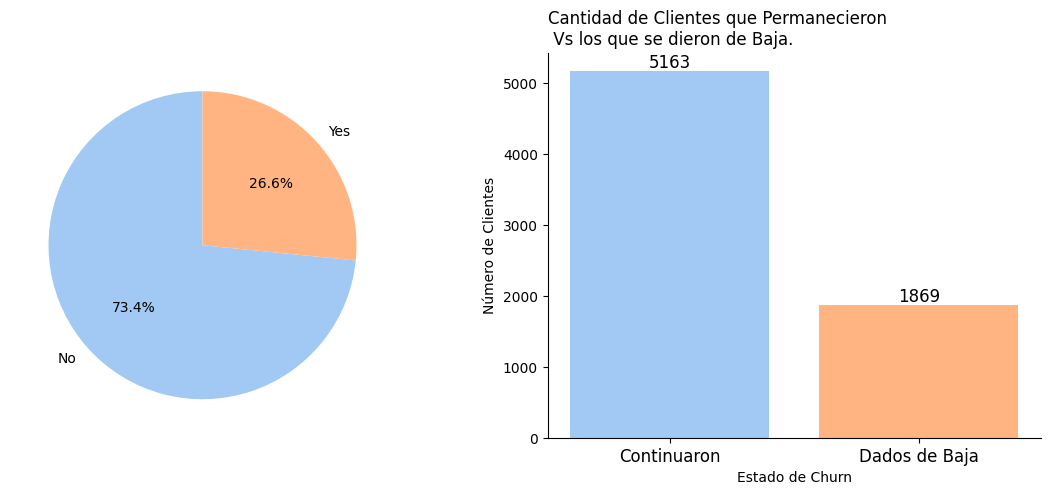

In [81]:
fig, ax = plt.subplots(1,2, figsize=(14, 5))

# Primer Gráfico de Pie
ax[0].pie(
    churn_counts.values,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    # wedgeprops=dict(width=0.5)
)

# Segudo Gráfico de Barras
ax[1].bar(x=churn_counts.index, height=churn_counts.values, color=sns.color_palette("pastel"))
ax[1].set_title('Cantidad de Clientes que Permanecieron\n Vs los que se dieron de Baja.', loc='left')
ax[1].set_xlabel('Estado de Churn')
ax[1].set_ylabel('Número de Clientes')


ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].xaxis.set_tick_params(labelsize=12)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].set_xticks([0, 1], ['Continuaron', 'Dados de Baja'])

for i, value in enumerate(churn_counts.values):
    ax[1].text(i, value + 50, str(value), ha='center', fontsize=12)

plt.show()

## Recuento de evasión por variables categóricas

In [82]:
def plot_churn_por_categoria(df, columna):
    plt.figure(figsize=(10,6))
    prop = pd.crosstab(df[columna], df['churn'], normalize='index')
    prop.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"))
    plt.title(f'Proporción de churn según {columna}')
    plt.ylabel('Proporción')
    plt.xlabel(columna)
    plt.legend(['Permanecen', 'Se dieron de baja'], loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [83]:
def plot_grouped_churn(df, columna):
    plt.figure(figsize=(10,6))
    prop = pd.crosstab(df[columna], df['churn'])
    prop.plot(kind='bar',  color=sns.color_palette("pastel"))
    plt.title(f'Proporción de churn según {columna}')
    plt.ylabel('Proporción')
    plt.xlabel(columna)
    plt.legend(['Permanecen', 'Se dieron de baja'], loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

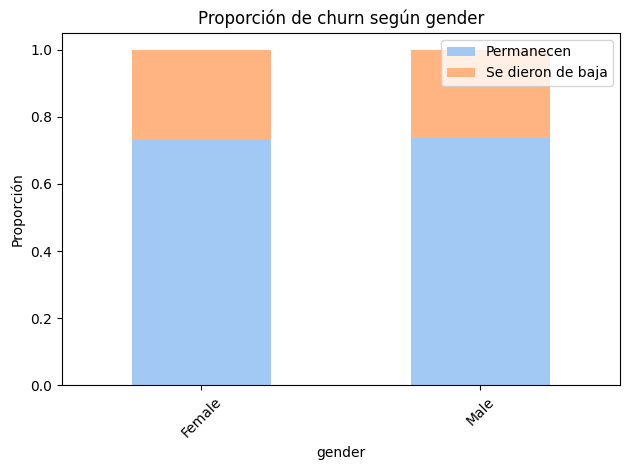

<Figure size 1000x600 with 0 Axes>

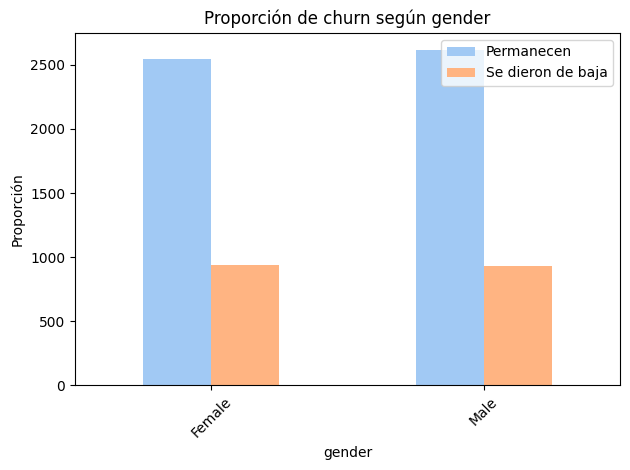

<Figure size 1000x600 with 0 Axes>

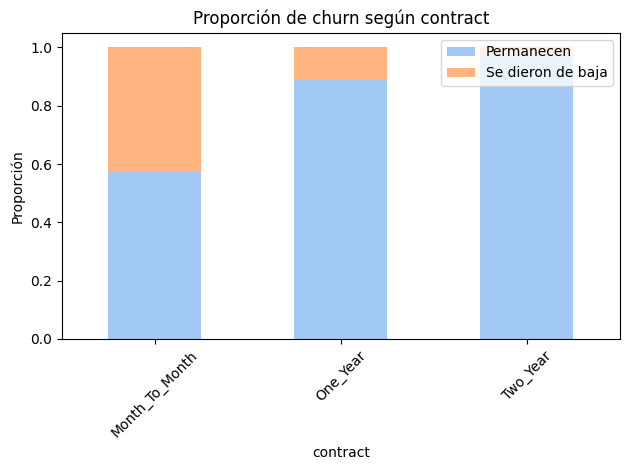

<Figure size 1000x600 with 0 Axes>

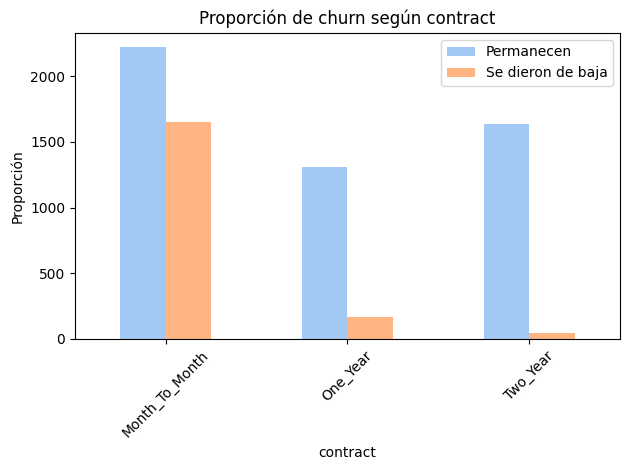

<Figure size 1000x600 with 0 Axes>

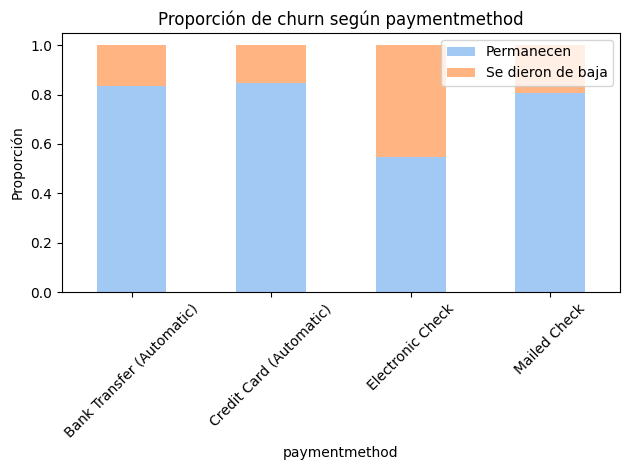

<Figure size 1000x600 with 0 Axes>

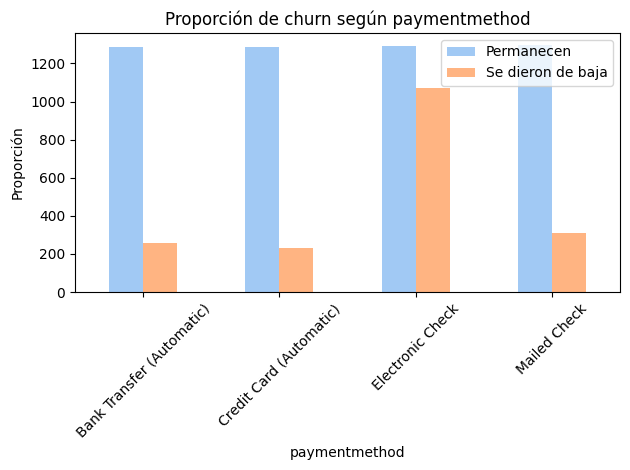

<Figure size 1000x600 with 0 Axes>

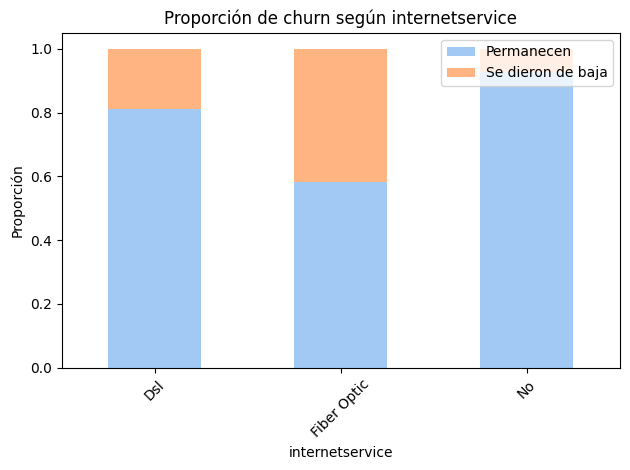

<Figure size 1000x600 with 0 Axes>

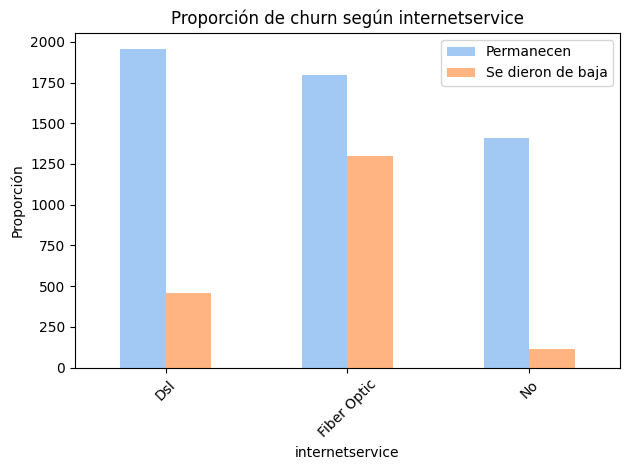

<Figure size 1000x600 with 0 Axes>

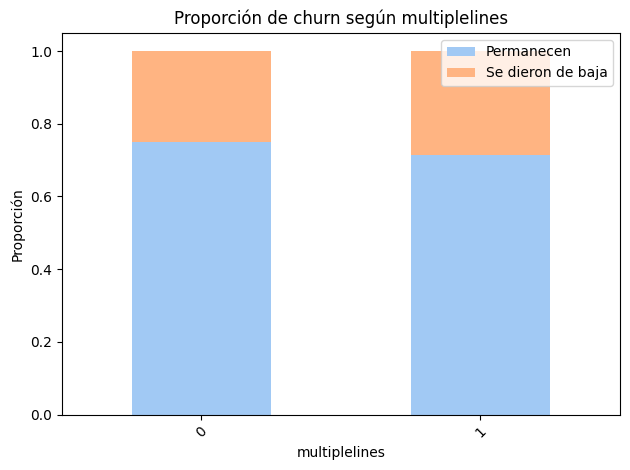

<Figure size 1000x600 with 0 Axes>

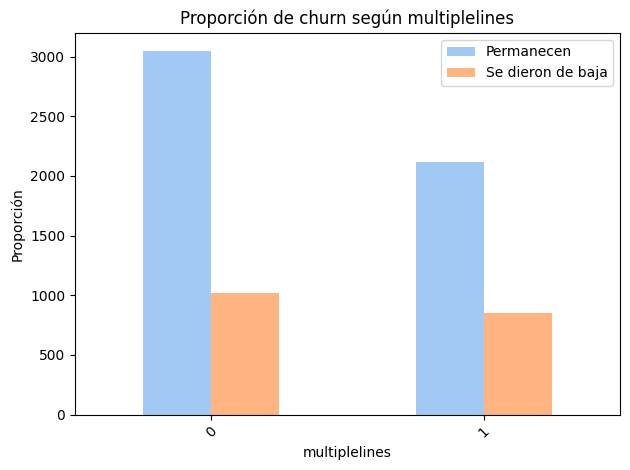

In [84]:
# Lista de variables categóricas a analizar
categoricas = ['gender', 'contract', 'paymentmethod', 'internetservice', 'multiplelines']

for col in categoricas:
    plot_churn_por_categoria(df, col)
    plot_grouped_churn(df, col)

## Conteo de evasión por variables numéricas


In [85]:
def plot_numeric_vs_churn(df, numeric_column):
    plt.figure(figsize=(10,6))
    sns.boxplot(
    y='churn',  # variable categórica (eje Y ahora)
    x=numeric_column,  # variable numérica (eje X)
    data=df,
    orient='h',
    palette=sns.color_palette("pastel")
)
    # sns.boxplot(x='churn', y=numeric_column, data=df, palette='Set2')
    plt.title(f'{numeric_column} vs Churn')
    plt.xlabel('Churn (0 = permanece, 1 = se dio de baja)')
    plt.ylabel(numeric_column)
    plt.xticks([0,1], ['Permanecen', 'Se dieron de baja'])
    plt.tight_layout()
    plt.show()

In [86]:
def plot_histogram_by_churn(df, column):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=column, hue='churn', kde=True, element='step', stat='density', palette=sns.color_palette("pastel"))
    # sns.histplot(data=df, x=column, hue='churn', kde=True, element='step', stat='density', palette='Set2')
    plt.title(f'Distribución de {column} por churn')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.tight_layout()
    plt.show()

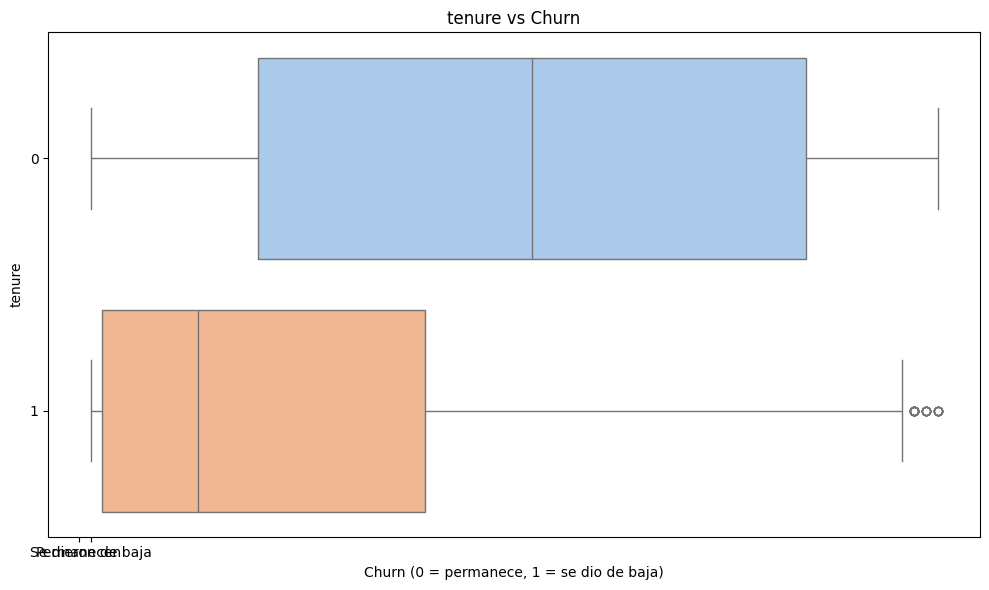

-----------------------------------------------------------


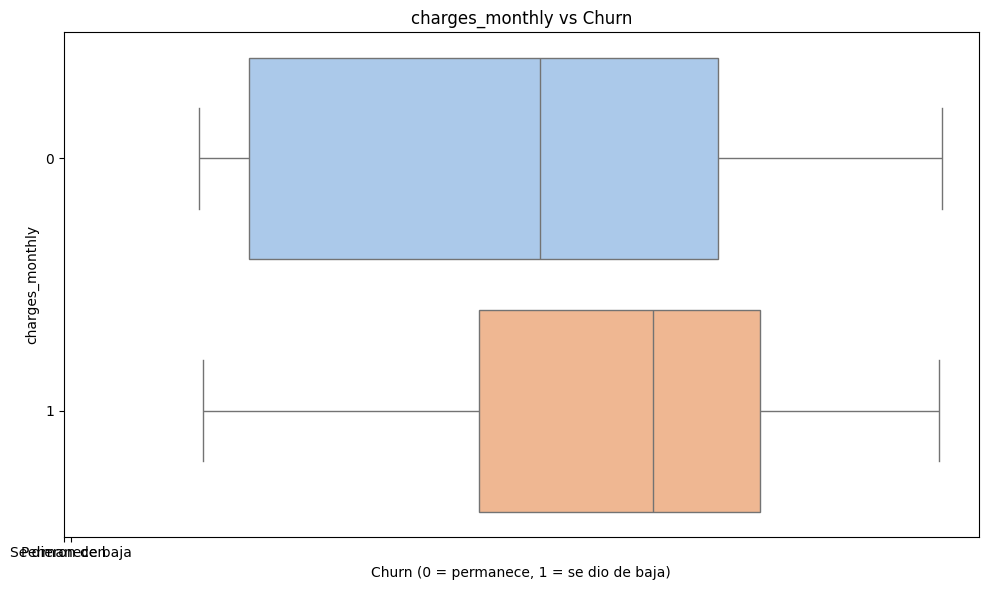

-----------------------------------------------------------


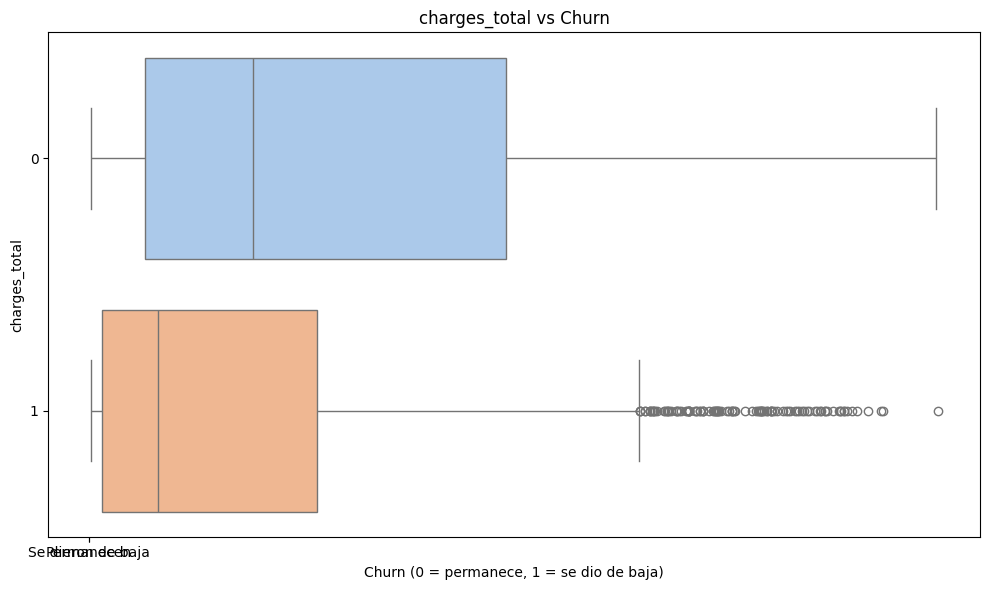

-----------------------------------------------------------


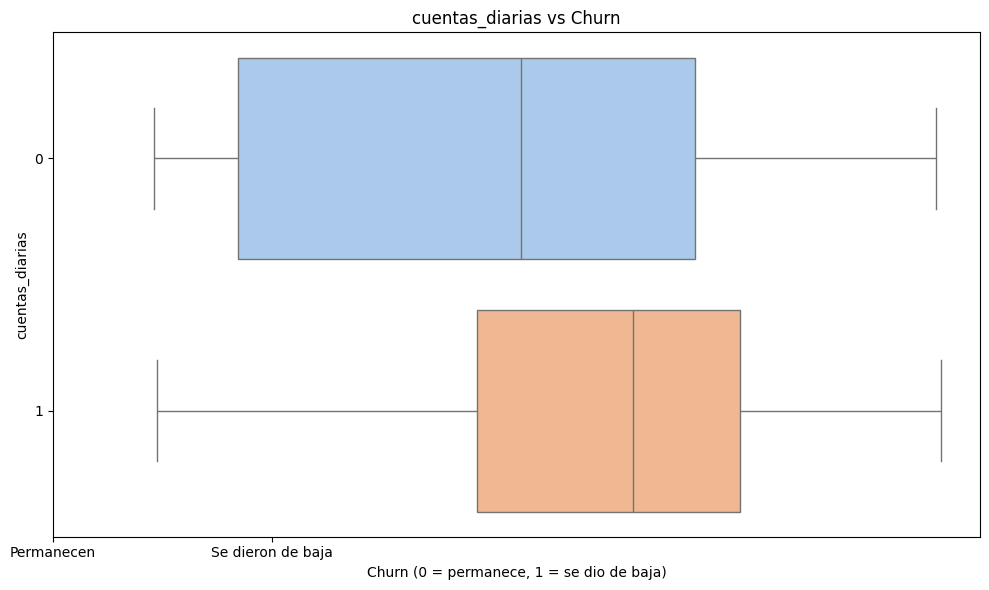

-----------------------------------------------------------


In [87]:
for col in columnas_numericas:
    plot_numeric_vs_churn(df, col)
    # plot_histogram_by_churn(df, col)
    print('-----------------------------------------------------------')

In [88]:
# def plot_histogram_churn(df, numeric_column):
#     plt.figure(figsize=(8, 4))
#     sns.histplot(data=df, x=numeric_column, hue='churn', kde=True, palette=sns.color_palette("pastel"), element="step", stat="density", common_norm=False)
#     plt.title(f'Distribución de {numeric_column} por churn')
#     plt.xlabel(numeric_column)
#     plt.ylabel('Densidad')
#     plt.legend(labels=['Permanece (0)', 'Baja (1)'])
#     plt.tight_layout()
#     plt.show()


In [89]:
# from scipy.stats import ttest_ind

# def ttest_churn_difference(df, numeric_column):
#     grupo_0 = df[df['churn'] == 0][numeric_column].dropna()
#     grupo_1 = df[df['churn'] == 1][numeric_column].dropna()
#     t_stat, p_value = ttest_ind(grupo_0, grupo_1, equal_var=False)

#     print(f'\n🔍 Variable: {numeric_column}')
#     print(f'T-statistic: {t_stat:.4f}')
#     print(f'P-valor: {p_value:.4f}')

#     if p_value < 0.05:
#         print("➡️ Hay una diferencia significativa entre los grupos (p < 0.05)")
#     else:
#         print("➡️ No se encontró diferencia significativa entre los grupos (p ≥ 0.05)")


In [90]:
# columnas_numericas = ['charges_total', 'charges_monthly', 'tenure', 'ternure_days', 'cuentas_diarias']

# for col in columnas_numericas:
#     # plot_numeric_vs_churn_horizontal(df, col)
#     plot_histogram_churn(df, col)
#     ttest_churn_difference(df, col)


#📄Informe final

##  🔍 1. Introducción

Este análisis busca identificar los patrones que explican el abandono de clientes (churn) en el sector de telecomunicaciones.
El churn representa una amenaza clave para la retención, al reflejar la pérdida de usuarios activos.
Detectar los factores asociados permite tomar decisiones informadas.
Esto facilita mejorar la experiencia del cliente y reducir la rotación.

## 🧹 2. Limpieza y Tratamiento de Datos

Se cargaron los datos desde un archivo .json (TelecomX_Data.json) usando pandas. Las variables incluyen información demográfica, servicios contratados, duración del contrato y cargos mensuales y totales entre otros.

🧺 Pasos de limpieza realizados:

- Se Aplanó cada columna del diccionrio.
- Se convirtieron variables categóricas a tipo category.
- Se creó una variable binaria llamada "cols_a_binarias"  para facilitar cálculos posteriores ('Yes' → 1, 'No' → 0).
- Se verificó la ausencia de valores nulos.
- Se trató datos duplicados.

## 📈 Variables numéricas procesadas:

- tenure: Meses con la compañía.
- charges_monthly: Cargo mensual.
- charges_total: Total acumulado pagado.
- tenure_days: Tiempo en días (derivado).
- cuentas_diarias: Para calcular el valor diario.

## 📊 3. Análisis Exploratorio de Datos


### 📌 Distribución general del Churn

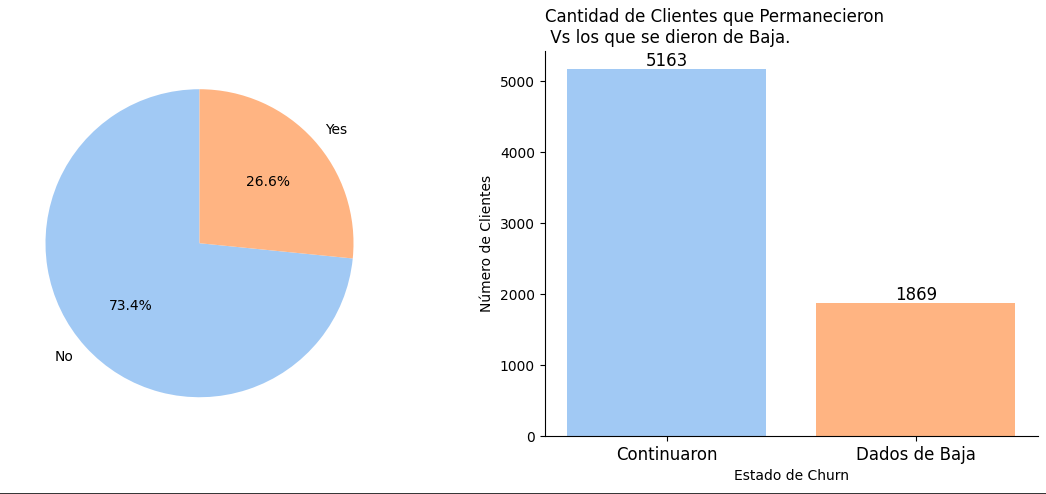

### 📃📈 **Análisis:** Un 26.6% de los clientes analizados han abandonado el servicio.

### 📌📌 Por tipo de contrato:

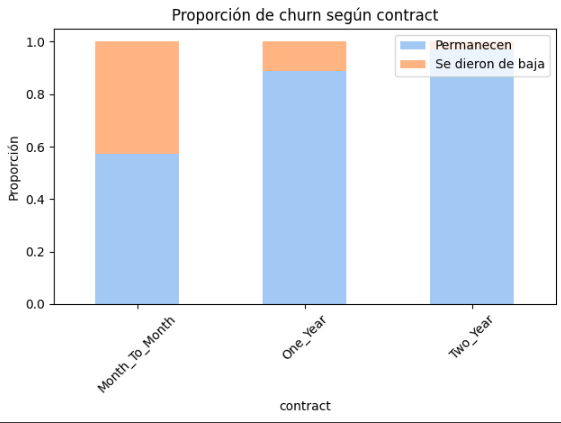


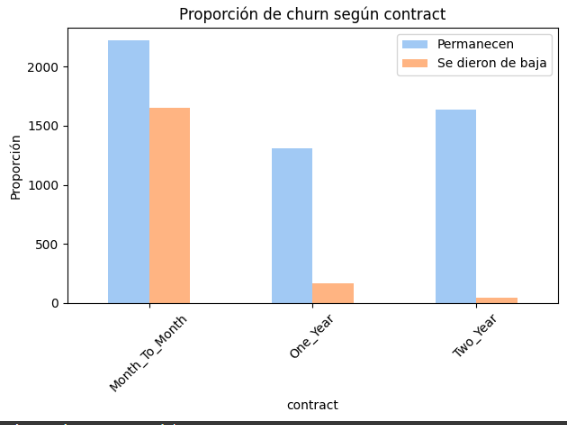

### 📃📈 Análisis:  Los clientes con contrato mensual tienen una tasa de abandono mucho mayor que quienes tienen contratos anuales o bienales.

---

## 📝 4. Conclusiones e Insights

### 📌 Principales hallazgos:

### 1. Los contratos mensuales tienen mayor churn.
- Indican menor compromiso por parte del cliente.
- Representa un grupo prioritario para acciones de fidelización.


### 2. Clientes nuevos tienden a irse antes.
- Baja tenure está correlacionada con abandono temprano.
- Requiere atención durante las primeras semanas/meses.

### 3. Altos cargos mensuales sin valor percibido aumentan el riesgo de churn.
- Puede ser un síntoma de mala percepción del servicio o falta de personalización.

### 4. Método de pago automático reduce el abandono.
- Facilita la continuidad del servicio.
- Puede usarse como incentivo para fidelizar.


## 🚀 5. Recomendaciones

### 1. Ofrecer descuentos por contratos anuales o bienales
- Incentivar el cambio de contrato mensual a largo plazo.
- Ejemplo: regalo de meses adicionales o bonificaciones.

### 2. Programa de onboarding para nuevos clientes
- Mejorar la primera experiencia para reducir abandono temprano.
- Ofrecer guías, soporte técnico inicial o beneficios iniciales.

### 3. Segmentación por gasto mensual
- Ofrecer planes alternativos o paquetes premium a clientes de alto valor.
- Personalizar ofertas para evitar que clientes de alto costo se vayan.

### 4. Promoción de pago automático
- Beneficios exclusivos para clientes con pago automático (ej. descuentos, acceso a contenido adicional).

### 5. Monitoreo proactivo de clientes de alto riesgo
- Implementar modelos predictivos para identificar clientes con alta probabilidad de abandonar.
- Contactarlos antes de que tomen la decisión final.

## ✅ Conclusión

  Este análisis exploratorio ha permitido identificar patrones claros que explican el comportamiento de los clientes frente al abandono. Con esta información, se pueden diseñar estrategias efectivas para disminuir el churn , incrementar la retención y mejorar la rentabilidad a largo plazo.

---

# Segunda Parte

In [91]:
df.sample(5)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,cuentas_diarias
1469,0,Female,1,0,0,71,1,1,Fiber Optic,0,...,1,0,1,1,One_Year,1,Electronic Check,105.90,7521.95,3.531432
5162,0,Male,0,0,0,62,0,0,Dsl,1,...,1,1,0,0,Two_Year,1,Bank Transfer (Automatic),43.70,2618.30,1.407688
6665,0,Male,0,1,0,66,1,1,Fiber Optic,0,...,1,0,0,1,One_Year,0,Electronic Check,95.30,6273.40,3.168384
2728,0,Male,0,0,0,37,0,0,Dsl,1,...,0,1,0,0,Two_Year,1,Mailed Check,40.55,1390.85,1.253018
913,0,Female,0,0,0,7,0,0,Dsl,0,...,0,0,0,0,Month_To_Month,0,Bank Transfer (Automatic),25.05,189.95,0.904524


In [46]:
columnas_categoricas = df.select_dtypes(include='object').columns.tolist()
print("Variables categóricas:", columnas_categoricas)

Variables categóricas: ['gender', 'internetservice', 'contract', 'paymentmethod']


In [93]:
# Se Realiza One-HotEncoding
# pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)


# Correlación

In [45]:
df.describe().round(2)

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,cuentas_diarias
count,7032.00,7032.00,7032.00,7032.00,7032.00,7032.0,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.27,0.16,0.48,0.30,32.42,0.9,0.42,0.29,0.34,0.34,0.29,0.38,0.39,0.59,64.80,2283.30,2.16
std,0.44,0.37,0.50,0.46,24.55,0.3,0.49,0.45,0.48,0.48,0.45,0.49,0.49,0.49,30.09,2266.77,1.01
min,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.46
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.59,401.45,1.21
50%,0.00,0.00,0.00,0.00,29.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,70.35,1397.48,2.35
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,89.86,3794.74,3.01
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,118.75,8684.80,4.05


In [45]:
# servicios = ['phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
#              'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

# # Creamos la nueva columna
# df['n_servicios'] = df[servicios].sum(axis=1)

In [47]:
# corr = df.corr(numeric_only=True).round(4)
# # corr

In [44]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Matriz de correlación")
# plt.tight_layout()
# plt.show()